Тест 1

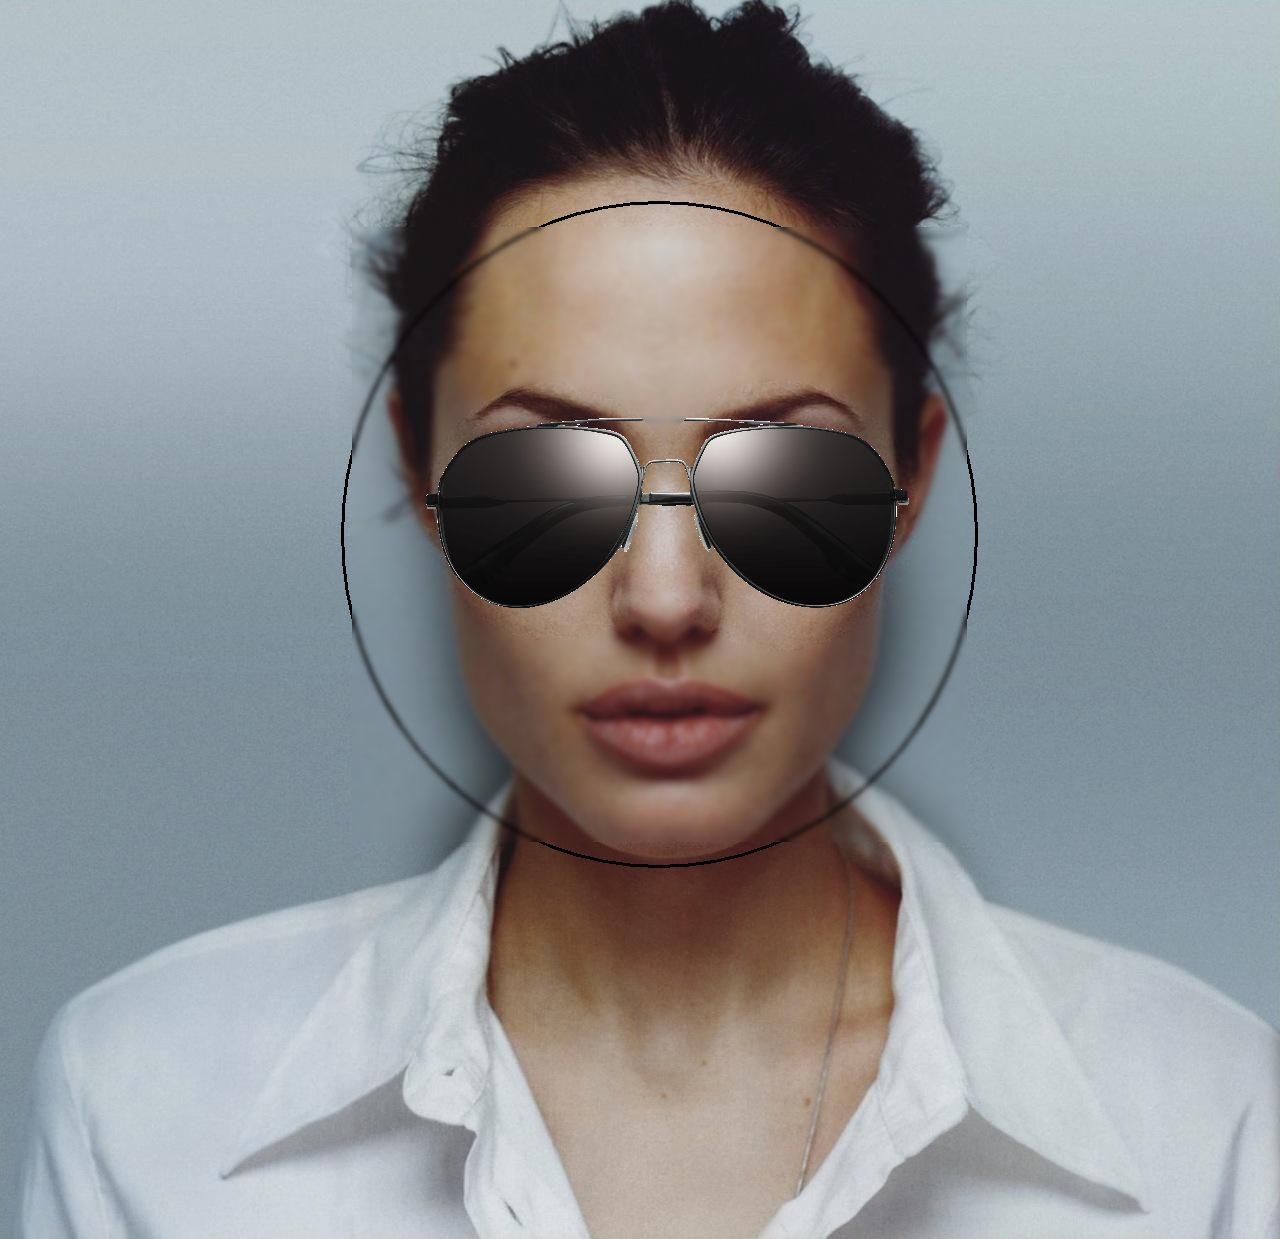

In [146]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the actor's or actress's photo
image_path = "angelina.jpg"
image = cv2.imread(image_path)

# Create a module for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces and eyes
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# Load sunglasses image with alpha channel
sunglasses = cv2.imread("sunglasses.png", cv2.IMREAD_UNCHANGED)

for (x, y, w, h) in faces:
    # Find eyes on the face
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

        # Draw blue oval around the face
    oval_center_x = x + w // 2
    oval_center_y = y + h // 2
    oval_radius_x = (w + 20) // 2
    oval_radius_y = (h + 50) // 2
    blue_color = (0, 0, 0)
    cv2.ellipse(image, (oval_center_x, oval_center_y), (oval_radius_x, oval_radius_y), 0, 0, 360, blue_color, 2)


    if len(eyes) >= 2:
        average_eyes_width = sum([ew for (_, _, ew, _) in eyes]) / len(eyes)
        sunglasses_width = int(average_eyes_width * 3.5)  # Increase the width by 3.5 times
        sunglasses_height = int(sunglasses_width * sunglasses.shape[0] / sunglasses.shape[1])

        sunglasses_resized = cv2.resize(sunglasses, (sunglasses_width, sunglasses_height))

        sunglasses_x = x + int((sum([ex for (ex, _, _, _) in eyes]) / len(eyes))) - int(sunglasses_width / 3)
        sunglasses_y = y + int((sum([ey for (_, ey, _, _) in eyes]) / len(eyes)))

        for i in range(sunglasses_resized.shape[0]):
            for j in range(sunglasses_resized.shape[1]):
                if sunglasses_resized[i, j, 3] != 0:  # Check transparency value
                    image[sunglasses_y + i, sunglasses_x + j] = sunglasses_resized[i, j, :3]



    # Create a mask for the eye regions
    mask = np.ones_like(roi_gray) * 255

    for (ex, ey, ew, eh) in eyes:
        eye_center = (int(ex + ew / 1.7), int(ey + eh / 1.2))
        radius = int(min(ew, eh) * 0.9)  # Increase by a factor (adjust this value according to desired area)
        cv2.circle(mask, eye_center, radius, (0, 255, 0), -2)

    # Apply Gaussian blur to the face area excluding the eyes
    blurred = cv2.GaussianBlur(image[y:y+h, x:x+w], (15, 15), 0)
    image[y:y+h, x:x+w] = np.where(mask[:, :, np.newaxis] != 0, blurred, image[y:y+h, x:x+w])

# Display the result
cv2_imshow(image)


Тест 2

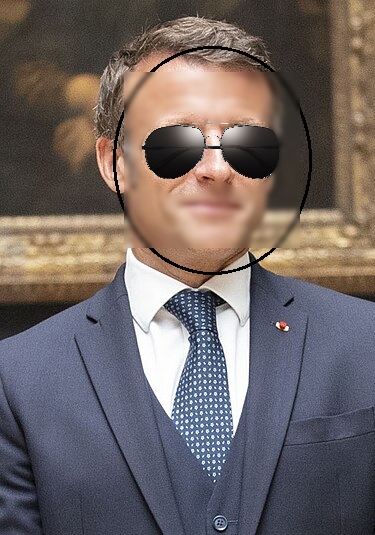

In [148]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the actor's or actress's photo
image_path = "macron.jpg"
image = cv2.imread(image_path)

# Create a module for face and eye detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces and eyes
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# Load sunglasses image with alpha channel
sunglasses = cv2.imread("sunglasses.png", cv2.IMREAD_UNCHANGED)

for (x, y, w, h) in faces:
    # Find eyes on the face
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

        # Draw blue oval around the face
    oval_center_x = x + w // 2
    oval_center_y = y + h // 2
    oval_radius_x = (w + 20) // 2
    oval_radius_y = (h + 50) // 2
    blue_color = (0, 0, 0)
    cv2.ellipse(image, (oval_center_x, oval_center_y), (oval_radius_x, oval_radius_y), 0, 0, 360, blue_color, 2)


    if len(eyes) >= 2:
        average_eyes_width = sum([ew for (_, _, ew, _) in eyes]) / len(eyes)
        sunglasses_width = int(average_eyes_width * 3.5)  # Increase the width by 3.5 times
        sunglasses_height = int(sunglasses_width * sunglasses.shape[0] / sunglasses.shape[1])

        sunglasses_resized = cv2.resize(sunglasses, (sunglasses_width, sunglasses_height))

        sunglasses_x = x + int((sum([ex for (ex, _, _, _) in eyes]) / len(eyes))) - int(sunglasses_width / 3)
        sunglasses_y = y + int((sum([ey for (_, ey, _, _) in eyes]) / len(eyes)))

        for i in range(sunglasses_resized.shape[0]):
            for j in range(sunglasses_resized.shape[1]):
                if sunglasses_resized[i, j, 3] != 0:  # Check transparency value
                    image[sunglasses_y + i, sunglasses_x + j] = sunglasses_resized[i, j, :3]



    # Create a mask for the eye regions
    mask = np.ones_like(roi_gray) * 255

    for (ex, ey, ew, eh) in eyes:
        eye_center = (int(ex + ew / 1.7), int(ey + eh / 1.2))
        radius = int(min(ew, eh) * 0.9)  # Increase by a factor (adjust this value according to desired area)
        cv2.circle(mask, eye_center, radius, (0, 255, 0), -2)

    # Apply Gaussian blur to the face area excluding the eyes
    blurred = cv2.GaussianBlur(image[y:y+h, x:x+w], (15, 15), 0)
    image[y:y+h, x:x+w] = np.where(mask[:, :, np.newaxis] != 0, blurred, image[y:y+h, x:x+w])

# Display the result
cv2_imshow(image)
